https://www.kaggle.com/hasanburakavci/titanic-eda-and-classification

<font color='red'>

# Titanic EDA Project
    
<font color='black'>

Content of The Titanic Exploratory Data Analysis
1. [Chapter-1 Data Load and Check](#1)
    * [1-Outlier Detection](#2)
    * [2-Joining Test and Train Data](#3)
    * [3-Feature Check](#4)
1. [Chapter-2 Data Analysis](#5)
    * [1-Feature Analysis](#6)
    * [2-Corelation Between Feature](#7)
1. [Chapter-3 Missing Value](#8)
    * [1-Find Missing Value](#9)
    * [2-Fill Missing Value](#10)
1. [Chapter-4 Data Engineering](#11)
    * [1-New Feature](#12)
    * [2-Drop Feature](#13)
    * [3-One Hot Encoding](#14)
1. [Chapter-5 Modeling](#16)
    * [1-Train-Test Split](#17)
    * [2-Classification Methods](#18)
    * [3-Ensemble Modeling](#19)
    * [4-Result](#20)


   
    
    
    
    



    
    
    

<a id='1'></a><br>
# Chapter:1 Data Load And Check

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

train_data = pd.read_csv("data/titanic_train.csv")
test_data = pd.read_csv("data/titanic_test.csv")
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 <a id='2'></a><br>
## 1-Outlier Detection


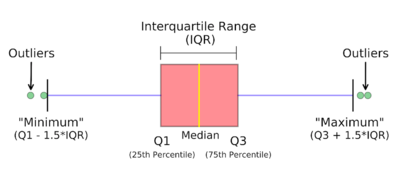

* Q1 = 1.Quartile 25%
* Q2 = 2.Quartile 50% (median)
* Q3 = 3.Quartile 75%
* IQR = Q3 - Q1
* Outlier data = (Q1 - 1.5 IQR ) U (Q3 + 1.5 IQR)



In [15]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
from collections import Counter
def outlier_detect(feature, data):
    outlier_index = []

    for each in feature:
        Q1 = np.percentile(data[each], 25)
        Q3 = np.percentile(data[each], 75)
        IQR = Q3 - Q1
        outlier_list = data[(data[each] < Q1 - 1.5*IQR) | (data[each] > Q3 + 1.5*IQR)].index
        outlier_index.extend(outlier_list)
        
    outlier_index = Counter(outlier_index)
    outlier_data = list(i for i, v in outlier_index.items() if v > 3)
    return outlier_data

In [17]:
outlier_data = outlier_detect(["Age","SibSp","Parch","Fare"], train_data)
train_data.loc[outlier_data]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
outlier_data

[]

In [19]:
train_data = train_data.drop(outlier_data, axis=0).reset_index(drop=True)

<a id='3'></a><br>
## 2-Combining Train and Test Data


* Train_data and test_data are combined so that data is obtained. 


In [20]:
# 因為後面會重新整理欄位的值，所以需要將資料先合併在一起
# train與test資料結合後index還是會維持原本兩邊的，這樣會有重複的值出現
# 因此需要重設index，reset_index會重新將index編號。
# drop = True 的意思是把原先的index丟掉。
#    如果沒有這個參數，原先的index會變成一個新欄位
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

<a id='4'></a><br>
## 3-Feature Analysis

Object
1. Name        : 
1. Sex         : male and female
1. Ticket      : ticket number 票號
1. Cabin       : cabin category 船艙號碼
1. Embarked    : port C, Q and S 出發地

Int64
1. PassengerId : unique id number 乘客代碼
1. Survived    : 0 -> died ,1-> survived 是否存活
1. Pclasss     : 1, 2 and 3 船票等級
1. SibSp       : number of siblings/spouse 兄弟姊妹與伴侶數量
1. Parch       : number of parent/children 父母跟子女的數量

Float64
1. Age         : age of passenger 乘客年紀
1. Fare        : price of the ticket 票價

### Survived

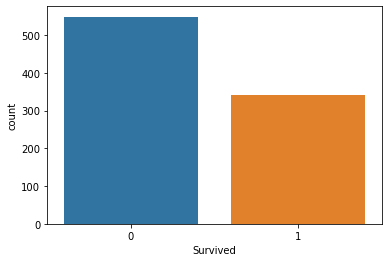

In [22]:
sns.countplot(x='Survived',data=train_data )

In [23]:
data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [24]:
print('整體生存率', 342/(342+549))

整體生存率 0.3838383838383838


In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<a id='5'></a><br>
# Chapter:2 Data Analysis

* Feature Analysis
* Corelation Between Features



<a id='6'></a><br>
## 1- Feature Analysis

* Sex - Survived
* Pclass - Survived
* Embarked - Survived
* SibSp - Survived
* Parch - Survived
* Age - Survived
* Fare - Survived

### Sex - Survived

Female are more likely to survive than male.

In [26]:
data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()
# groupby預設會把群聚的欄位變成index，as_index=False會將群聚的欄位依然保持為欄位

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
# 下面的方式等同上面的方法
data[["Sex", "Survived"]].groupby(["Sex"]).mean().reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


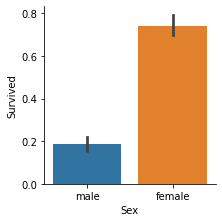

In [28]:
g = sns.catplot(x="Sex", y ="Survived", data=data, kind="bar", height=3)
plt.show()

### Pclass - Survived

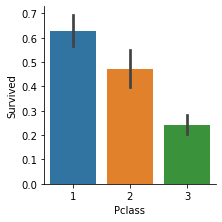

In [29]:
sns.catplot(x="Pclass", y ="Survived", data=data, kind="bar", height=3)
plt.show()

### Embarked - Survived

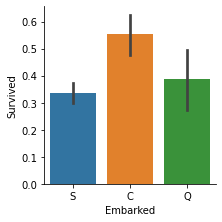

In [30]:
sns.catplot(x="Embarked", y ="Survived", data=data, kind="bar", height=3)
plt.show()

### SibSp - Survived

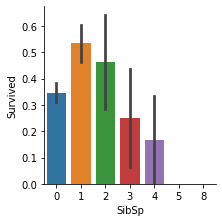

In [31]:
sns.catplot(x="SibSp", y ="Survived", data=data, kind="bar", height=3)
plt.show()

### Parch - Survived

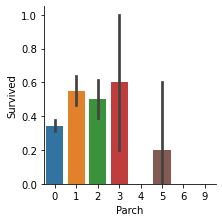

In [32]:
sns.catplot(x="Parch", y ="Survived", data=data, kind="bar", height=3)
plt.show()

 ### Age - Survived

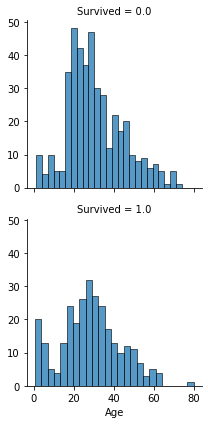

In [33]:
g = sns.FacetGrid(data, row="Survived")
g.map(sns.histplot, "Age", bins=25)
plt.show()

 ### Fare - Survived

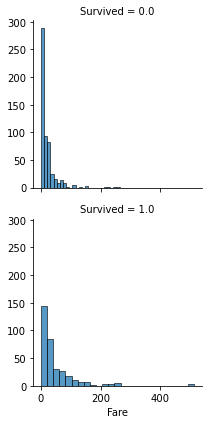

In [34]:
g = sns.FacetGrid(data, row="Survived")
g.map(sns.histplot, "Fare", bins=25)
plt.show()

<a id='7'></a><br>
## 2-Colelation Between Features

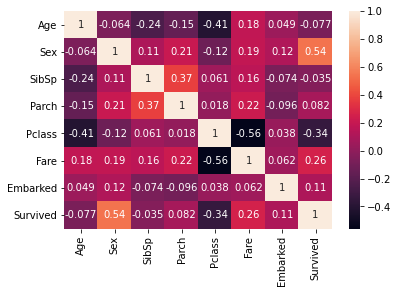

In [35]:
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# male: 0, famela: 1
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

與生存率有高相關性的欄位 (>0.2)
- 性別 (0.54)
- 船票等級 (-0.34) 
- 票價 (0.26)

其他有高相關性的欄位組合
- 子女 跟 性別 (0.21)
- 攜帶的兄弟姊妹跟配偶數目 與 年齡 (-0.24)
- 船票等級 與 年齡 (-0.41)
- 攜帶的兄弟姊妹跟配偶數目 與 攜帶父母與子女數目 (0.37)
- 船票等級 與 票價 (-0.56)

**Outcome**    

* Sex, Pclass, Fare and Embarked are associated with Survived. 


<a id='8'></a><br>
# Chapter-3 Missing Value

* Find Missing Value
* Fill Missing Value


<a id='9'></a><br>
## 1-Find Missing Value

In [36]:
data.columns[data.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [37]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<a id='10'></a><br>
## 2-Fill Missing Value

* Cabin has 1007 missing value
* Age has 256 missing value
* Embarked has 2 missing value
* Fare has 1 missing value

**Not: Survived has 418 missing value (only test value) 因為測試資料缺少生存這個欄位**

### Fare Fill Value

In [38]:
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0.0


In [39]:
# 將同樣出發地跟同樣船票等級的票價平均值當成缺失資料的值
data["Fare"] = data["Fare"].fillna(
    np.mean(data[((data["Pclass"]==3) & (data["Embarked"]==0))]["Fare"]))
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Embarked Fill Value
S = 0,  C = 1 and Q = 2

In [40]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


這兩筆資料缺少出發地，原則上相同出發地與船票等級的票價應該接近。所以可以根據出發地與船票等級來聚類找出票價中位數最接近的一組。

In [29]:
data.groupby(['Embarked','Pclass'])['Fare'].median()

Embarked  Pclass
0.0       1         52.0000
          2         15.3750
          3          8.0500
1.0       1         76.7292
          2         15.3146
          3          7.8958
2.0       1         90.0000
          2         12.3500
          3          7.7500
Name: Fare, dtype: float64

Pclass=1時，三個出發地票價的中位數最接近80的是 Embarked='C' (1.0)

In [30]:
data["Embarked"] = data["Embarked"].fillna(1)
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Age Fill Value


* Age feature will be done later

In [31]:
data[data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1.0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,NaN,2.0
1301,1302,NaN,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,NaN,2.0
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0.0


<a id='8'></a><br>
# Chapter-4 Data Engineering

* New Feature
* Edit Feature
* Drop Feature
* Normalization

<a id='12'></a><br>
## 1-New - Feature
* Alone and Family
* Name - Title
* Age Missing Value
* Age Limit

### Family 
增加一個欄位: 家庭人數
* SibSp + Parch = family 


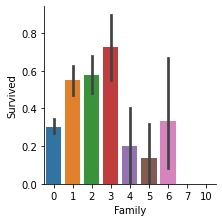

In [32]:
data["Family"] = data["SibSp"] + data["Parch"]
sns.catplot(x="Family", y ="Survived", data=data, kind="bar", height=3)
plt.show()

In [33]:
# 增加一個是否單身的欄位
data["Alone"] = [1 if i == 0 else 0 for i in data["Family"]]

# 家人數目在1~3人時，有比較高的生存率
# 因此將 1~3人聚成一類
data["Family"].replace([0,1,2,3,4,5,6,7,10], [0,1,1,1,0,2,0,2,2], inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1


### Name - Title
頭銜

In [34]:
# 將頭銜從姓名的欄位中獨立萃取出來
data['Title']=data.Name.str.extract('([A-Za-z]+)\.')

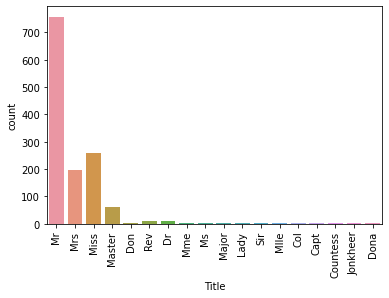

In [35]:
# 觀看各種不同頭銜的人數統計
sns.countplot(x = 'Title', data = data)
plt.xticks(rotation = 90)
plt.show()

In [36]:
# 有些頭銜代表相同的意義，所以重新整理與對應
data['Title'].replace(
    ['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],
    ['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], 
    inplace=True)

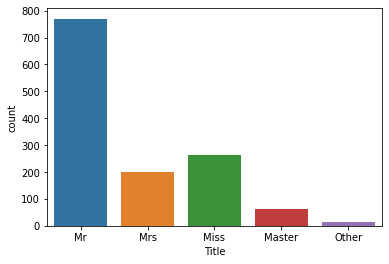

In [37]:
# 再一次觀看整理後不同頭銜的人數統計
sns.countplot(x = 'Title', data=data)
plt.show()

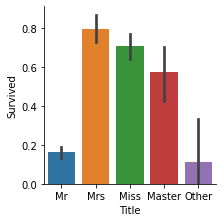

In [38]:
# 列出不同頭銜的生存率
sns.catplot(x="Title", y ="Survived", data=data, kind="bar", height=3)
plt.show()

- 女性頭銜的生存率最高
- Mrs 又比 Miss 高一些，可能是因為有帶小孩
- Master 頭銜的人生存率比 Mr 高數倍

In [39]:
# 將頭銜重新編碼
data["Title"].replace(["Mr","Mrs","Miss","Master","Other"], [1,2,3,4,5], inplace=True)

### Age Missing Value
處理年齡這個欄位缺失值

<AxesSubplot:>

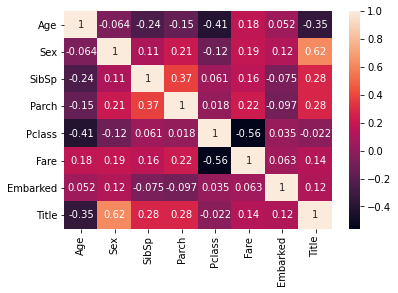

In [40]:
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Title"]].corr(), annot = True)
# 檢視年齡跟其他欄位的關係，以供補缺失值的參考

年齡與 **船票等級**跟**頭銜**這兩個欄位的相關性極高

In [41]:
# 原本年齡欄位的缺失數量
data['Age'].isnull().sum()

263

In [42]:
data_age_nan_index = data[data["Age"].isnull()].index #年齡欄位有缺失值的資料位置
for i in data_age_nan_index:
    # 計算相同 船票等級 跟 頭銜 的人的年齡平均值，用來當作缺失值的補值
    mean_age = data.loc[(data["Pclass"]==data.iloc[i]["Pclass"]) & ((data["Title"]==data.iloc[i]["Title"]))]["Age"].mean()
    data.loc[i, 'Age'] = mean_age

In [43]:
# 修正後年齡欄位的缺失數量
data['Age'].isnull().sum()

0

In [44]:
# 將頭銜重新編碼
data["Title"].replace([1,2,3,4,5], [1,2,2,3,1], inplace=True)

### Age Limit

[**pd.cut()** 跟 **pd.qcut()** 的參考](https://medium.com/@morris_tai/pandas%E7%9A%84cut-qcut%E5%87%BD%E6%95%B8-93c244e34cfc)

In [45]:
# 將年齡均分成五等分，看看生存率是否有差別
data['Age_Limit']=pd.cut(data['Age'], 5)
data.groupby(['Age_Limit'])['Survived'].mean()

Age_Limit
(0.0902, 16.136]    0.548077
(16.136, 32.102]    0.332627
(32.102, 48.068]    0.412766
(48.068, 64.034]    0.434783
(64.034, 80.0]      0.090909
Name: Survived, dtype: float64

- 未成年人的生存率有高一些
- 16~32歲的年輕人生存率略低
- 64歲以上的老年人生存率急遽降低

In [46]:
# 將年齡均分並編號
data['Age_Limit']=0
data.loc[data['Age']<=16,'Age_Limit']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_Limit']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_Limit']=2
data.loc[(data['Age']>48)&(data['Age']<=60),'Age_Limit']=3
data.loc[data['Age']>60,'Age_Limit']=4

### Fare Limit

In [47]:
data['Fare_Range']=pd.qcut(data['Fare'],6)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.775]",0.205128
"(7.775, 8.662]",0.190789
"(8.662, 14.454]",0.366906
"(14.454, 26.0]",0.436242
"(26.0, 53.1]",0.435065
"(53.1, 512.329]",0.695035


票價與生存率有非常高的相關性，尤其是最高票價區間的

In [48]:
# 將票價按照區間重新編碼
data['Fare_Limit']=0
data.loc[data['Fare']<=8.662,'Fare_Limit']=0
data.loc[(data['Fare']>8.662)&(data['Fare']<=14.454),'Fare_Limit']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=53.1),'Fare_Limit']=2
data.loc[data['Fare']>53.1,'Fare_Limit']=3

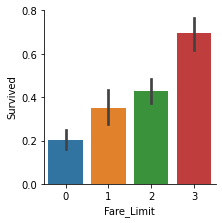

In [49]:
# 畫出4個不同票價區間與生存率的關係
sns.catplot(x="Fare_Limit", y ="Survived", data=data, kind="bar", height=3)
plt.show()

### Corelation Matrix

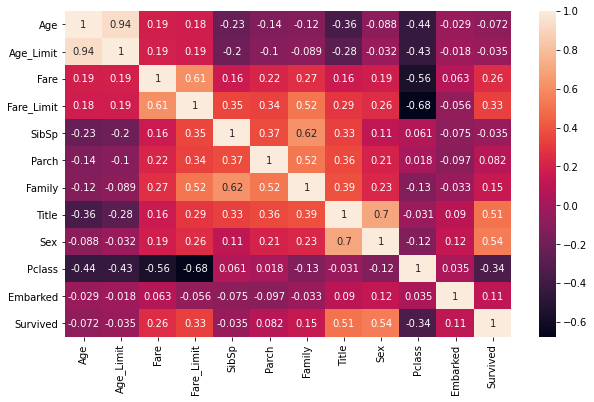

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(data[["Age","Age_Limit","Fare","Fare_Limit", 
                  "SibSp","Parch","Family", 
                  "Title","Sex","Pclass","Embarked", "Survived"]].corr(), annot = True)
plt.show()

查看新增的欄位跟生存率的關係
- Title 欄位有高相關性
- Fare_Limit 比起 Fare 與生存率的相關性更高了
- 合併 SibSp,Parch為Family後相關性高出許多
- 將Age分群成Age_Limit後相關性並沒有比較高

<a id='13'></a><br>
## 2- Drop Features
* Ticket, Cabin, Name, PassengerId and Age are deleted according to the result of the corelation matrix.

In [51]:
# 將不需要用到的欄位移除
data.drop(labels=["Age","Fare","Fare_Range", "Ticket","Cabin", "Name", "PassengerId"], axis=1, inplace = True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Family,Alone,Title,Age_Limit,Fare_Limit
0,0.0,3,0,1,0,0.0,1,0,1,1,0
1,1.0,1,1,1,0,1.0,1,0,2,2,3
2,1.0,3,1,0,0,0.0,0,1,2,1,0
3,1.0,1,1,1,0,0.0,1,0,2,2,2
4,0.0,3,0,0,0,0.0,0,1,1,2,0


<a id='14'></a><br>
## 3 - One Hot Encoding

In [52]:
data = pd.get_dummies(data,columns=["Pclass","Sex","Embarked","Family","Age_Limit","Fare_Limit"])
data.head()

,Survived,SibSp,Parch,Alone,Title,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,...,Family_2,Age_Limit_0,Age_Limit_1,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3
0,0.0,1,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1.0,1,0,0,2,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1.0,0,0,1,2,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
3,1.0,1,0,0,2,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0.0,0,0,1,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


<a id='16'></a><br>
# Chapter:5 Modeling

In [53]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<a id='17'></a><br>
## 1-Train Test Split

In [54]:
# 檢查先前的前處理是否有改變資料數量
if len(data) == (len(train_data) + len(test_data)):
    print("success")

success


將資料重新分成**訓練組**與**測試組**

In [55]:
test = data[len(train_data):].copy()
test.drop(labels="Survived", axis=1, inplace=True)

In [56]:
# 將訓練組又再區分成 訓練資料與驗證資料 Train and Valid
train = data[:len(train_data)].copy()
X_train = train.drop(labels = "Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

<a id='18'></a><br>
## 2-Classificaiton Methods


* Logistic Regression
* Random Forest Regression
* Support Vector Machine (SVM)
* K-Nearest Neighbors (KNN)

### Logistic Regression

In [57]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Accuracy: ", log_reg.score(X_test,y_test))

Accuracy:  0.8171641791044776


### Random Forest Regression

In [58]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(X_train, y_train)
print("Accuracy: ", rf_reg.score(X_test,y_test))

Accuracy:  0.7873134328358209


### Support Vector Machine (SVM)

In [59]:
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
print("Accuracy: ", svm_clsf.score(X_test,y_test))

Accuracy:  0.835820895522388


### KNN

In [60]:
best_knn = []
for n in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    best_knn.insert(n, knn.score(X_test,y_test))
best_knn


[0.7388059701492538,
 0.8022388059701493,
 0.8022388059701493,
 0.8059701492537313,
 0.8134328358208955,
 0.7947761194029851,
 0.8097014925373134,
 0.8097014925373134,
 0.8059701492537313,
 0.8059701492537313,
 0.8208955223880597]

當演算法有參數可以調整時，需要使用驗證組資料來決定哪個參數比較好

In [61]:
knn_clsf = KNeighborsClassifier(n_neighbors=9)
knn_clsf.fit(X_train, y_train)
print("Accuracy: ", knn_clsf.score(X_test,y_test))

Accuracy:  0.8059701492537313


<a id='19'></a><br>
## 3- Ensemble Modeling
將上面四種不同的分類器合併成一個共同決策的系統

In [62]:
voting_classfication = VotingClassifier(estimators = [('lg', log_reg), ('rfg', rf_reg), ('svc', svm_clsf), ('knn', knn_clsf)], voting="hard", n_jobs=-1)
voting_classfication.fit(X_train, y_train)
print("Accuracy: ", voting_classfication.score(X_test,y_test))

Accuracy:  0.8171641791044776


<a id='20'></a><br>
## 4-Result



In [63]:
test_result = pd.Series(voting_classfication.predict(test), name = "Survived").astype(int)
results = pd.concat([test_data["PassengerId"], test_result],axis = 1)
results
# results.to_csv("hba_titanic_eda.csv", index = False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


titanic_test_leaked.csv 是對應考題 titanic_test.csv 洩漏的答案

In [64]:
test_leaked = pd.read_csv('data/titanic_test_leaked.csv')
results['leaked'] = test_leaked['Survived']
results['isCorrect'] = (results['Survived'] == results['leaked'])
# results[results['isCorrect']==True].count()
print('Test Accuracy', results['isCorrect'].sum() / results.shape[0])

Test Accuracy 0.7799043062200957


## Cross Validation 交叉驗證
為了驗證需要將資料分成訓練組跟驗證組，但是當資料筆數已經稀少時再分成兩組很困難。此時可以使用交叉驗證的方式，將資料切割成n組，每次將其中一組當成驗證資料，重複跑n次驗證再整合起來。
![Alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/LOOCV.gif/450px-LOOCV.gif "Cross Validation 交叉驗證 示意圖")

In [67]:
train = data[:len(train_data)].copy()
X_train = train.drop(labels = "Survived", axis=1)
y_train = train["Survived"]

from sklearn.model_selection import cross_val_score
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
scores = cross_val_score(svm_clsf,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.8547486  0.8258427  0.8258427  0.80337079 0.85955056]
0.8338710689849979


### [scoring 的選擇](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

<table class="docutils align-default">
<colgroup>
<col style="width: 28%">
<col style="width: 41%">
<col style="width: 31%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Scoring</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Classification</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score" title="sklearn.metrics.accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘balanced_accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score" title="sklearn.metrics.balanced_accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.balanced_accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘average_precision’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score" title="sklearn.metrics.average_precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.average_precision_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_brier_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss" title="sklearn.metrics.brier_score_loss"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.brier_score_loss</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘f1’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>for binary targets</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_micro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>micro-averaged</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_macro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>macro-averaged</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>weighted average</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_samples’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>by multilabel sample</p></td>
</tr>
<tr class="row-even"><td><p>‘neg_log_loss’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss" title="sklearn.metrics.log_loss"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.log_loss</span></code></a></p></td>
<td><p>requires <code class="docutils literal notranslate"><span class="pre">predict_proba</span></code> support</p></td>
</tr>
<tr class="row-odd"><td><p>‘precision’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.precision_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-even"><td><p>‘recall’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.recall_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p>‘jaccard’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score" title="sklearn.metrics.jaccard_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.jaccard_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovr’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovo’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovr_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovo_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p><strong>Clustering</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘adjusted_mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score" title="sklearn.metrics.adjusted_mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.adjusted_mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘adjusted_rand_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score" title="sklearn.metrics.adjusted_rand_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.adjusted_rand_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘completeness_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score" title="sklearn.metrics.completeness_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.completeness_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘fowlkes_mallows_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score" title="sklearn.metrics.fowlkes_mallows_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.fowlkes_mallows_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘homogeneity_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score" title="sklearn.metrics.homogeneity_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.homogeneity_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score" title="sklearn.metrics.mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘normalized_mutual_info_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score" title="sklearn.metrics.normalized_mutual_info_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.normalized_mutual_info_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘v_measure_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score" title="sklearn.metrics.v_measure_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.v_measure_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p><strong>Regression</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘explained_variance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score" title="sklearn.metrics.explained_variance_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.explained_variance_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘max_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.max_error.html#sklearn.metrics.max_error" title="sklearn.metrics.max_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.max_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error" title="sklearn.metrics.mean_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_root_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_log_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error" title="sklearn.metrics.mean_squared_log_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_log_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_median_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error" title="sklearn.metrics.median_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.median_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘r2’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score" title="sklearn.metrics.r2_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.r2_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_poisson_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_poisson_deviance.html#sklearn.metrics.mean_poisson_deviance" title="sklearn.metrics.mean_poisson_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_poisson_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_gamma_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_gamma_deviance.html#sklearn.metrics.mean_gamma_deviance" title="sklearn.metrics.mean_gamma_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_gamma_deviance</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>
